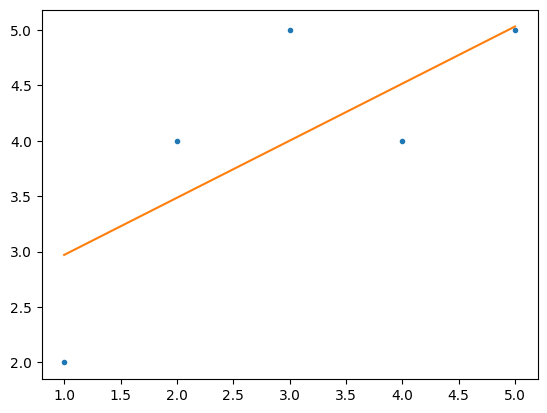

In [36]:
import array
import random
import numpy
import itertools

m = 0.515 
c = 2.455 

x = numpy.array([1,2,3,4,5])
y = numpy.array([2,4,5,4,5])

def compute_sse(squared_error):
    return numpy.sum(squared_error)

def compute_squared_error(m, c, x, y):
    model_prediction = m * x + c
    error = model_prediction - y
    return error ** 2
    
squared_error = compute_squared_error(m, c, x, y)
#print(squared_error)

import matplotlib.pyplot as plt # im p o r t l i b r a r y
plt.ion () # t h i s e n a b l e s i n t e r a c t i v e p l o t t i n g
plt.plot(x, y, '.')
plt.plot(x, m * x + c)
#plt.show()

In [74]:
#2.3 - 1 Grid Search
#m = 0.515 #0-2 steps=0.01
#c = 2.455 #0-5 steps=0.01

#    m ,  c
lower_bounds = [0, 0]
upper_bounds = [2, 5]
numbers_of_points = [200, 500]

def compute_points_k(lower_bound, upper_bound, number_of_points):
    step = (upper_bound - lower_bound) / (number_of_points - 1) 
    points = numpy.array([])
    points = numpy.append(points, lower_bound)

    current_point = lower_bound + step
    while current_point < upper_bound:
        points = numpy.append(points, current_point)
        current_point += step
    points = numpy.append(points, upper_bound)
    
    return points

def grid_search(lower_bounds, upper_bounds, numbers_of_points):
    #1 - create grid
    m = compute_points_k(lower_bounds[0], upper_bounds[0], numbers_of_points[0])
    c = compute_points_k(lower_bounds[1], upper_bounds[1], numbers_of_points[1])

    #2 - assess each point
    # m * c points = 200 * 500 = 100 000
    min_m = float('inf')
    min_c = float('inf')
    min_sse = float('inf')
    
    #print(len(m))
    #print(len(c))
    cartesian = itertools.product(m, c)
    for current_m, current_c in cartesian:
        sse = compute_squared_error(current_m, current_c, x, y)
        current_sse = compute_sse(sse)
        if current_sse < min_sse:
            min_sse = current_sse
            min_m = current_m
            min_c = current_c
    # print('m =', min_m, ' c =', min_c, ' sse =', min_sse)
    # optimal value,                     optimal solution
    return numpy.array([min_m, min_c]), min_sse

grid_search_result = grid_search(lower_bounds, upper_bounds, numbers_of_points)
print(grid_search_result)

(array([0.59296482, 2.22222222]), 2.4005011720305114)


In [75]:
#2.3 - 1 Random search - more precision but same points, while m * c - number of cells stays the same 
#m = 0.515 #0-2 steps=0.005
#c = 2.455 #0-5 steps=0.005
def random_search(lower_bounds, upper_bounds, numbers_of_points):
    #1 - create grid
    m = numpy.random.uniform(low = lower_bounds[0], high = upper_bounds[0], size = (numbers_of_points[0], 1))
    c = numpy.random.uniform(low = lower_bounds[1], high = upper_bounds[1], size = (numbers_of_points[1], 1))
    
    #2 - assess each point
    # m * c points = 100 000
    min_m = float('inf')
    min_c = float('inf')
    min_sse = float('inf')
    
    cartesian = itertools.product(m, c)
    for current_m, current_c in cartesian:
        sse = compute_squared_error(current_m, current_c, x, y)
        current_sse = compute_sse(sse)
        if current_sse < min_sse:
            min_sse = current_sse
            min_m = current_m
            min_c = current_c
                
    # print results
    # print('m =', min_m, ' c =', min_c, ' sse =', min_sse)
    return numpy.array([min_m, min_c]), min_sse

random_search_result = random_search(lower_bounds, upper_bounds, numbers_of_points)
print(random_search_result)

(array([[0.61167045],
       [2.15334813]]), 2.402039503014721)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f72a0ac8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f72a0ac8fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f72a0ac87c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f72a0ad5550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f72a0ad57f0>,
 'means': []}

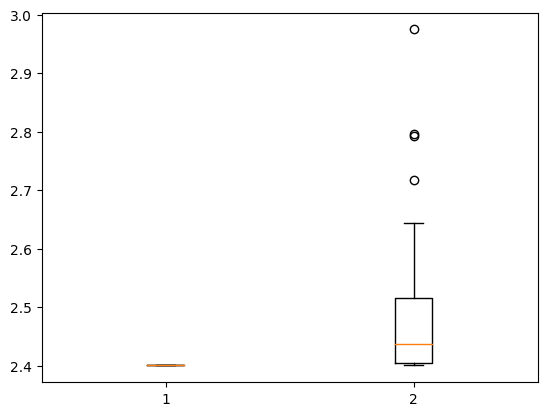

In [77]:
import matplotlib.pyplot as pyplot

tries = 30
grid_search_data = numpy.array([])
for i in range(tries):
    mc, sse = grid_search(lower_bounds, upper_bounds, numbers_of_points)
    grid_search_data = numpy.append(grid_search_data, sse)

random_search_data = numpy.array([])
for i in range(tries):
    mc, sse = random_search(lower_bounds, upper_bounds, numbers_of_points)
    random_search_data = numpy.append(random_search_data, sse)

pyplot.boxplot([grid_search_data, random_search_data])
